## **Objects in Python**
This is the last notebook on object-oriented programming in Python. The subject of this notebook is the object, you might think this is a bit odd, after all objects have been the focus of all the notebooks. Though this is true our discussions on objects have been superficial, the object is the very core of Python as a programming language. Knowing how to manipulate objects in Python allows you to be a much more efficient and effective programmer.

All object-oriented programming languages have objects, hence the name of course. An object is not much more than an allocated space in memory (on the heap), it has identification, a human readable name, it would be difficult to identify an object by its memory address. Finally, an object has the structure of a tagged tuple, a manner with which the object is constructed. The Python object is a mix of a C++ struct and a modula3 object. This mix delivers a flexible construct. A Python object is easy to use, easy to manipulate, but also quite difficult to protect from abuse. 

In Python literally everything is an object, and everything is a subclass of object (If you don't know what a subclass is, this notebook is not for you, you should read the Inheritance notebook). Quite often you will see the base / sub class relation being made explicit by a line of code like this.

`class ExampleOne(object):` 

The object is always the root of the directed acyclic graph (DAG) that is the Python object hierarchy. 

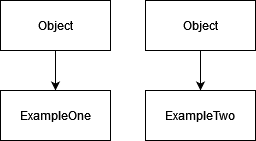

I have put the objects next to each other on purpose, for although Python has only one DAG you should consider object not to be the root, ExampleOne and ExampleTwo are not siblings. Instead you want to work with multiple object hierarchies.

The meaning of `class ExampleOne(object):` is that this class ExampleOne has no other superclass than object itself. I think you should not make this relation explicit and use `class ExampleOne:`.  Object is not part of the class hierarchy you will create.

I call the former explicit declaration, Google style, for I seem to recollect that at one time it stated in the Google Python style guide it was said to make this relationship explicit. I can't find it the current style guide so I might be wrong or they might have changed the style. However, using a style guide and a linter is a good idea, and why not use Google's style guide. See https://google.github.io/styleguide/pyguide.html.

Pylint is an example of a linter, pylint will give you advice on style and substance, make your code both less prone to bugs and much more readable for fellow programmers.

## **class objects & instance objects** 

There are two forms of object-oriented programming, there is the prototype programming, mostly known from JavaScript and other ECMA script dialects, and there is class based programming. Python is class based. As everything in Python is an object, Python objects come in two flavours:

 * class object
 * instance object
 
The first to understand is the class object, the class object has two roles:

 1. to function as blueprint of all objects belonging to this class. 
 2. The second role is to create objects of this class. 
 
For the first role class defines & names attribute references, in doing so it creates the namespace of the object. A namespace is a set of signs (names) that are used to identify and refer to the attributes the object has. The use of the namespace is that it ensures names can reused over multiple objects, iff the object identifiers are unique. We can access the attributes by using the object identifier and the name. 

`ExampleOne.variable` & `ExampleTwo.variable`

Python class objects have three types of attributes:

 1. Instance variables (confusingly so perhaps, these are mostly referred to as attributes in OO-speak)
 2. Class variables
 3. Methods

Methods we can further subdivide in:
 * regular methods
 * class methods
 * static methods
 
Python also knows an abstract method but that belongs to the abc module not the class object itself.

Let's see a class object.


In [ ]:
class ExampleOne:
    '''an example class we can inspect.'''
    classvar:int = 1
    
    def __init__(self, nr:int, text:str)->None:
        self.nr = nr
        self.text = text
        


It is important to understand that a class object functions as a blueprint for all objects of this class. 

The other goal of the class object is to instantiate the object, that is to create it in memory with a unique identifier and the instance variables being assigned a value.

The difference between an class object and an instance object is that the latter only lives in memory. If the computer is off, the object does not exist. This in contrast to the class object that lives in program code stored on some sort of medium, usually a hard disk. 

In [ ]:
one = ExampleOne(nr=7, text='This is an instance object')

The first step is a call to a special method named `__new__`, this will create a new object with a memory address 

The return value of new is an object an instance object of its class

We can inspect that our object has a memory location via the `id()` function.

In [ ]:
id(one)

In [ ]:
help(ExampleOne)

Python has an excellent help function that is I feel often under used. 

The help function tells us most of what we want to know about a class object.

 * line 1: class ExampleOne(builtins.object) - tells us that ExampleOne has no super classes other than object, object is the superclass to all other objects, it is the object that Python built-in.
 * line 2: ExampleOne(nr: int, text: str) -> None - This is the code we need to execute to create the object, this will call the static method `__new__`. The astute observer will have noticed we do not define that method, we inherit it from builtins.object.
 * line 3: an example class we can inspect - The message the author wants to give the user of the class, it makes the intent of the class clear. You should read the Google style guide for how to properly comment on your code.
 * line 4: Methods defined here: - names the methods we have defined for our class object
 * line 5: `__init__(self, nr: int, text: str) -> None` - initialize self, the object
 * line 6:  Data descriptors defined here: - similar to line 4 but instead of naming the methods defined in our class objects, it names the data descriptors we have defined here. For now, it is only important to remember that the instance variables are kept in a dictionary, one that can be called on with the name `__dict__`. I will show you how to do that in a moment and will discuss data descriptors in depth later in this notebook.
 * line 7: We are going to skip weak references here. I will quickly explain them at the end of this notebook.
 * line 8: Data and other attributes defined here: - functions similar to line four and six, but now it refers to the other data, such as the class variable we have named, including the value, see line 10. And a dict giving the annotations we have used for our class variable, see line 9.

All this information we have received from help. There is more to help but we will see that later. For now you should understand that you can use this information in your programming. We can access the instance variables of any object by calling its dict.


In [ ]:
one.__dict__

We can change the value of attributes by accessing the dictionary directly. 

This might seem like something you should not do, but if you become experienced in Python this is probably something you want to do. I will some uses of this later, when we move into descriptors.

In [ ]:
one.__dict__['text'] = 'This is a very different example'

In [ ]:
one.text

In [ ]:
one.__annotations__

In [ ]:
one.classvar

In [ ]:
class ExampleTwo:
    '''This is an example class with given instantiation values'''
    
    def __init__(self)->None:
        self.number = 5
        self.txt = 'Second a silver lining'
        
    def __repr__(self)->str:
        return f'{self.__class__.__name__} has two data attributes: {self.number} & {self.txt}'
    
    def __str__(self)->str:
        return f'This is a very different object'
    
    def text(self):
        return self.txt

In [ ]:
snd = ExampleTwo()

#### **instance object** 
`snd`is the second flavour of objects Python has, it is the object instance. The instance object can really only do one thing, it can do attribute references.

There are two types of attribute references, method references and data references.

Let me begin by calling help to see what is all in there, and what is not.

In [ ]:
help(type(snd))

As you can see there are four methods defined in the class object.

There are data descriptors, they will be given a standard start value at initialization.

There are no other data, no annotations nothing.

`snd` can only do attribute reference, meaning I can call the instance attributes

In [ ]:
snd.number

In [ ]:
snd.txt

and I can call the methods

In [ ]:
print(snd)

In [ ]:
snd

In [ ]:
snd.text()

If we inspect the code of `__repr__` a bit closer we see that I call `self.__class__.__name__` in the format string. 

Consider that line of code, apperently there are more attributes

In [ ]:
snd.__class__

In [ ]:
snd.__class__.__name__

Of course this is circular it is akin to:

In [ ]:
type(snd)

In [ ]:
type(snd).__name__

The function `type` basically calls the attribute `__class__` on its argument. 

All built-in functions in Python have this relationship with a special method e.g., `print` with `__str__` and `repr` with `__repr__`. 

To understand where this comes from we would have to look back at `object`.

`object` comes with a host of method attributes. These are called special methods and have a prefix and suffix of a double underscore, known in Python talk as a dunder. We have already seen two special methods: `__new__` and `__init__` but it has quite a few more, too many for me to list. You should look at the Python data model to see all of them and how to use them for effective Python programming. https://docs.python.org/3/reference/datamodel.html#special-method-names 

In this notebook I can only show you a few of them ones that allow you to do surprising things in Python. 

Though you inherit all these methods, after all everything is a subclass of `object`, however not all these methods are implemented. 

`object` also comes with special (data) attributes. For instance `__name__` is a special attribute, again all other classes inherit `__name__` from `object`.


In [ ]:
object.__name__

In [ ]:
object.__qualname__

We have already seen a special data attribute in action.

In [ ]:
one.__dict__

We can see most (not all don't ask me why) methods defined for an object if we call on `dir(object)`

In [ ]:
dir(object)

Most of these I am not going to discuss here, for they have very specific roles in Python. 

The special methods that control the basic operations of an object are:

 * `__new__`
 * `__init__`
 * `__del__`

These are responsible for creation and deletion of an object. I have discussed the first two, (there is more to know) but haven't really discussed `__del__` which is called when we want the instance object to be destroyed.

In [ ]:
id(snd)

id is not the actual hexadecimal memory address instead it is a more readable integer. 

The CPython interpreter uses converts this integer to hexidecimal  memory address of the object on the heap

A non-overridden version of `__repr__` will give you the hexadecimal

In [ ]:
repr(one)

In [ ]:
del(snd)

In [ ]:
id(snd)

## **Member Access Control & Attribute Validation** 

I learned OO-programming in Java and as such I have a slightly different understanding of object than a Python trained programmer. For a Python trained programmer an object is what we described above, a tagged tuple, with attributes, that functions as blueprint, or a location in memory with a unique identifier that can reference attributes.

For me as a trained Java programmer this definition is incomplete. I would say that a class is a tagged tuple with members, being attributes methods, and member access control. An object would be basically the same definition. Where Python has method and data attributes, Java seperates them in terminology and has attributes and methods. 

A Java class reads different from a Python class, the difference is twofold:

 1. Java is a static typed language
 2. Jave defines member access control.

A Java class will look like the following code:

In [ ]:
class Bicycle {
    # don't run this cell it is Java not Python
  // attribute    
  private int gear = 5;

  // method   
  public void braking() {    
    System.out.println("Braking");   
   }
} 


As you can see a Java class is very similar to a Python, loose from some syntax, the clear difference is in typing and in member access control.

Java enforces typing (by the compiler), this is the reason why it is general faster, less prone to bugs, but also more difficult to learn and verbose. 

Java also enforces member access control, with the keywords private, protected, *no modifier*, and public. This in order of strictness. Java data attributes are usually private, meaning you cannot access them outside the class itself. Public is the same member access as Python has, pretty much unlimited access. 

The fact that Java knows member access control & static typing makes it easy to validate attributes both on type and value. There are compelling reasons why you want to control the validity of especially data attributes. Attributes determine the state of an object. What if we want to avoid undesireable states, states where attributes cannot have certain values, for these values will lead to unwanted behaviour or bugs. On a higher level, we want to avoid dependecies on implementations. A user of an API for instance, should not depend on the implementation of the methods presented in the API.

Of course Python has the "private" variable but those are not really private as you know. This lack of built-in member access makes it more difficult in Python to validate attributes. Therefore you will see quite often attributes "validated"with a error for type and an if/else for value. See the code below

In [7]:
class LineItem:
    
    def __init__(self,description:str, weight:float, price:float)->None:
        self.description = description
        self.weight = weight
        self.price  = price
    
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    

In [8]:
oranges = LineItem(description='oranges', weight=1.6, price=3.17)
oranges.subtotal()

5.07

This code works but has some obvious flaws:
 1. Weight and price cannot be negative
 2. We state that weight & price are of type float but we do not validate that
 
How to overcome these flaws, with all you have read sofar, do you think the following code suffices?

In [93]:
from typing import Union

numeric = Union[float, int]
numeric_values = set([float, int])

class LineItem:
    '''This class contains Line Items for a super market cash register system'''
    
    arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
    arg_type = 'The wrong types are used, please check the types of your arguments.'
    
    def __init__(self,description:str, weight:numeric, price:numeric)->None:
        if type(description) == str and type(weight) in numeric_values and type(price) in numeric_values:
            if weight >= 0 and price >=0:
                self._description = description
                self._weight = weight
                self._price  = price
            else:
                raise ValueError(self.arg_neg) 
        else:
            raise TypeError(self.arg_type)
            
    def set_price(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._price = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
            
    def set_weight(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._weight = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
                
    def subtotal(self)->float:
        return round(self._weight * self._price,2)    

In [90]:
oranges = LineItem(description='oranges', weight=1.6, price=3.17)

In [91]:
bananas = LineItem(description='bananas', weight=1.6, price='an awful lot')

The wrong types are used, please check the types of your arguments.


In [92]:
herons = LineItem(description='herons', weight=1.6, price=-1)

we cannot have negative weights and/or prices, please adjust the argument accordingly


This code obviously validates both on price and type, however ponder the question for a second is this good enough? 

Consider for a second how Python creates objects, it is two step process that happens when we invoke:

`herons = LineItem(description='herons', weight=1.6, price=-1)` 

`__new__` creates the object for us, `__init__` only initializes the data attributes if any exists (in case you wondered why `__init__` has a self, this is why ).

In [13]:
id(herons)

2251767986064

In [14]:
herons._weight = 10_000

In [15]:
herons._weight

10000

In [16]:
type(herons)

__main__.LineItem

#### **Factory pattern**

We need to adjust our code to keep the memory from cluttering with incomplete objects, and worse. 

That should be an easy fix, you have read how to do this already, simply use `__del__`, unfortunately it is not an easy fix. I cannot actively delete an object that Python created if I don't like the initalization. Python simple garabage collects them when there are no more references to that object. In the mean time we can simply add attributes to incomplete objects and the compiler fools us to think these incomplete objects are of the same type.

I am not convinced by this approach, I think it leads at best sloppy code, at worst buggy, unsafe code. I would have to construct a manner around it if I want to prevent object being created by doing attribute validation first. Lets do that by implementing the good old factory pattern.

In [82]:
from typing import Union, Optional

numeric = Union[float, int]
numeric_values = set([float, int])

arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
arg_type = 'The wrong types are used, please check the types of your arguments.'

class LineItemFactory:
    '''This is factory for making correct LineItem objects'''
    
    def create_line_item(self, name:str, description:str, price:numeric, weight:numeric)->Union[LineItem, None]:
        if type(description) == str and type(weight) in numeric_values and type(price) in numeric_values:
            if price >= 0 and weight >= 0:
                name = LineItem(description, price, weight)
                return name
            else:
                raise ValueError(arg_neg)
        else:
            raise TypeError(arg_type)                
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
        The attribute validation for initialization is done by the factory class
        DO NOT CREATE LineItems DIRECTLY, USE THE FACTORY!!!
    '''
    
    def __init__(self,description:str, price:numeric, weight:numeric)->None:
        self._description = description
        self._weight = weight
        self._price = price
            
    def set_price(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._price = value
            else:
                print(arg_neg)
        else:
            print(arg_type)
            
    def set_weight(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._weight = value
            else:
                print(arg_neg)
        else:
            print(arg_type)
                
    def subtotal(self)->float:
        return round(self._weight * self._price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[description:{self._description} price:{self._price} weight:{self._weight}]'
        
        

In [83]:
oranges = LineItemFactory().create_line_item(name='oranges', description='oranges', price=1.78, weight=2)

In [84]:
oranges

LineItem[description:oranges price:1.78 weight:2]

In [85]:
heronies = LineItemFactory().create_line_item(name='heronies', description='lovely juicy herons', price=-1.78, weight=2)

ValueError: we cannot have negative weights and/or prices, please adjust the argument accordingly

In [86]:
id(heronies)

140710597258440

In [87]:
type(heronies)

NoneType

In [88]:
heronies._weight = 10

AttributeError: 'NoneType' object has no attribute '_weight'

#### **Properties**

This pretty much the very best I can do to prevent Python from making objects that are incorrect.

Luckily Python has options for attribute validation that are better than the ones I present here. One of the possibilities Python offers us is to use properties. 

The built-in function `property(fget=None, fset=None, fdel=None, doc=None)` returns a property attribute. A property attribute is a class method that manages instance attributes, by giving it a getter, setter and deleter. In other words it is code that manages code, a form of meta programming. As I already wrote languages like Java and C++ you in general do not expose attributes to others, you keep them private and access them via an accessor or a mutator (your getter and setters) this allows you to validate attributes.

In Python attributes are directly accessable via Classinstance.attribute. This has potentionally severe consequences, all my previous validation work is useless. 

In [39]:
apples = LineItemFactory().create_line_item(name='apples', description='healthy apples', price=2.78, weight=1)
apples

LineItem[description:healthy apples price:2.78 weight:1]

I have just showed you a manner with which to guarantee that there are no faulty objects in memory.

This is important because we can abuse incorrect objects, but unfortunately we can also abuse correct objects.

In [40]:
apples._price = -2.78

In [41]:
apples.subtotal()

-2.78

Great I receive money when I buy a kilo of apples, this will help combat inflation!

Obviously we do not want this to happen.

create_line_item(name='heronies', description='lovely juicy herons', price=-1.78, weight=2)

This where properties come in, the built-in `property()` function allows you to control accessing, mutating and deletion of attributes. Preventing from altering attributes directly.

In [97]:
from typing import Union, Optional

numeric = Union[float, int]
numeric_values = set([float, int])

arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
arg_type = 'The wrong types are used, please check the types of your arguments.'


class LineItemFactory:
    '''This is factory for making correct LineItem objects'''
    
    def create_line_item(self, name:str, description:str, price:numeric, weight:numeric)->Union[LineItem, None]:
        if type(description) == str and type(weight) in numeric_values and type(price) in numeric_values:
            if price >= 0 and weight >= 0:
                name = LineItem(description, price, weight)
                return name
            else:
                raise ValueError(arg_neg)
        else:
            raise TypeError(arg_type)
                
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
        The attribute validation for initialization is done by the factory class
        DO NOT CREATE LineItems DIRECTLY, USE THE FACTORY!!!
    '''
        
    def __init__(self,description:str, price:numeric, weight:numeric)->None:
        self._description = description
        self.weight = weight
        self.price = price
    
    @property
    def weight(self)->float:
        return self.__weight
        
    @weight.setter
    def weight(self, value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self.__weight = value
            else:
                raise ValueError(arg_neg)
        else:
            raise TypeError(arg_type)
            
    @property
    def price(self)->None:
        return self.__price
    
    @price.setter
    def price(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self.__price = value
            else:
                raise ValueError(arg_neg)
        else:
            raise TypeError(arg_type)
        
                
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[description:{self._description} price:{self.price} weight:{self.weight}]'
        
        

In [98]:
apples = LineItemFactory().create_line_item(name='apples', description='healthy apples', price=2.78, weight=1)
apples

LineItem[description:healthy apples price:2.78 weight:1]

In [99]:
apples.price= -2.78

ValueError: we cannot have negative weights and/or prices, please adjust the argument accordingly

You do not have to use a decorator, I could have used the function `property()` itself, but I find this neater.

`@property` even controls the instantiation of the object of our object. 

In [100]:
beer = LineItem(description='beer', price=1.11, weight='bottle')
beer

TypeError: The wrong types are used, please check the types of your arguments.

But unfortunately we cannot get rid of our factory as our incomplete object still exists. 

In [101]:
type(beer)

__main__.LineItem

All in all the use of factory in combination with property is good way to prevent accidents.

It is even sufficient to stop people who understand Python from doing malicious things.

In [105]:
apples = LineItemFactory().create_line_item(name='apples', description='healthy apples', price=2.78, weight=1)
apples

LineItem[description:healthy apples price:2.78 weight:1]

In [106]:
apples.__dict__

{'_description': 'healthy apples',
 '_LineItem__weight': 1,
 '_LineItem__price': 2.78}

In [107]:
apples['_LineItem__price']=-2.78

TypeError: 'LineItem' object does not support item assignment

The only comment you good have is that code is not very DRY. Let me refactor the code a bit.

In [115]:
from typing import Union, Optional, Any

numeric = Union[float, int]
numeric_values = set([float, int])

arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
arg_type = 'The wrong types are used, please check the types of your arguments.'


class LineItemFactory:
    '''This is factory for making correct LineItem objects'''
    
    def create_line_item(self, name:str, description:str, price:numeric, weight:numeric)->Union[LineItem, None]:
        if type(description) == str and type(weight) in numeric_values and type(price) in numeric_values:
            if price >= 0 and weight >= 0:
                name = LineItem(description, price, weight)
                return name
            else:
                raise ValueError(arg_neg)
        else:
            raise TypeError(arg_type)
                
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
        The attribute validation for initialization is done by the factory class
        DO NOT CREATE LineItems DIRECTLY, USE THE FACTORY!!!
    '''
        
    def __init__(self,description:str, price:numeric, weight:numeric)->None:
        self._description = description
        self.weight = weight
        self.price = price
     
    def attribute_manager(attr_name:str)->property: 
        
        def getter(instance)->Any:
            return instance.__dict__[attr_name]
        
        def setter(instance, value)->None:
            if type(value) in numeric_values:
                if value >= 0:
                    instance.__dict__[attr_name] = value
                else:
                    raise ValueError(arg_neg)
            else:
                raise TypeError(arg_type)
        
        return property(getter, setter)
    
    weight = attribute_manager('weight')
    price = attribute_manager('price')
    
                
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[description:{self._description} price:{self.price} weight:{self.weight}]'
        

Now this code is mean and lean, but it might need some comment, for it is not that easy to understand.

We will start with property, I have used property as a decorator in the previous examples, here I do not, I use it as a function, even worse I use it as a return type of the method attribute_manager. `property()` is a built-in function of Python, functions in Python are "first class citizens" meaning they can be argument and return type to other function/methods. 

class property(fget=None, fset=None, fdel=None, doc=None) takes 4 arguments, defaults can be None, and it returns a property attribute. 

In [116]:
steak = LineItemFactory().create_line_item(name='steak', description='juicy steak', price=20.78, weight=0.5)
steak

LineItem[description:juicy steak price:20.78 weight:0.5]

In [117]:
steak.price = 33.05

In [118]:
steak

LineItem[description:juicy steak price:33.05 weight:0.5]

In [119]:
steak.weight = 'Croc wants an awful lot' 

TypeError: The wrong types are used, please check the types of your arguments.

In [120]:
steak.price = -10

ValueError: we cannot have negative weights and/or prices, please adjust the argument accordingly

This code works as expected, we have come a long way from our first attempt by using Python "private" attributes.

Now we are able to sufficiently protect our class from abuse and unnecessary object creation.

There is another way to do this, we can implement the descriptor interface. But before we do that I want to show you a compelling use case for using properties in APIs.